# Graduate Rotational Internship Program (GRIP): The Sparks Foundation

## Data Science & Business Analytics Internship

### Task 1- Prediction using Supervised ML 

### Author- Padmini Jain

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Import the Dataset

In [2]:
URL = "http://bit.ly/w-data"
df = pd.read_csv(URL)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### EDA (Exploratory Data Analysis)

In [3]:
df.shape # It shows the number of rows and columns in dataset

(25, 2)

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.isnull().sum() #No. missing values

Hours     0
Scores    0
dtype: int64

In [7]:
df.count()

Hours     25
Scores    25
dtype: int64

In [8]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


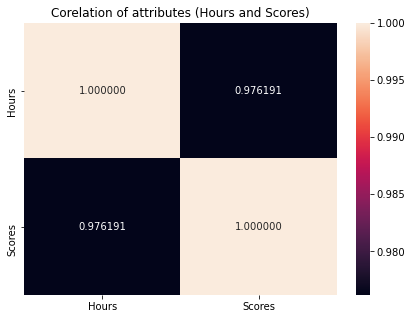

In [10]:
plt.subplots(figsize = (7,5))
sns.heatmap(df.corr(),annot=True,fmt="f").set_title("Corelation of attributes (Hours and Scores)")
plt.show()

#### It means that both the attributes are highly correlated.

### Data Visualization

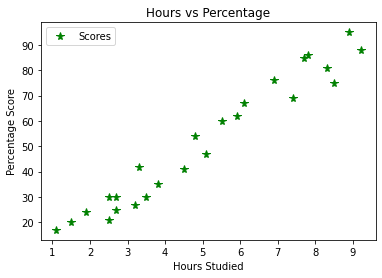

In [11]:
df.plot(x='Hours', y='Scores', style='*', markersize = '8', color = 'Green')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### The above plot shows the linear relation between the hours studies and the scores obtained.

### Data Preparation

In [12]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [13]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Split the data into train and test sets

In [15]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

In [16]:
print("x_train=", len(x_train))
print("x_test=", len(x_test))
print("y_train=", len(y_train))
print("y_test=", len(y_test))

x_train= 17
x_test= 8
y_train= 17
y_test= 8


### Building models

In [17]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression()

### Plot regression line

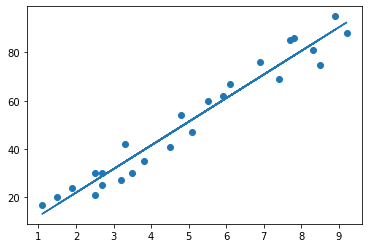

In [18]:
line = regressor.coef_*x+regressor.intercept_  

plt.scatter(x, y)  

plt.plot(x, line);  

plt.show()

### Prediction-

In [19]:
print(x_test)  
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


### Comaprision between actual values and Predicted values

In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### Model Evaluation-

In [21]:
from sklearn import metrics 
print("Mean Absolute Error (MAE):-", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE):-", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):-", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error (MAE):- 4.4197278080276545
Mean Squared Error (MSE):- 22.96509721270044
Root Mean Squared Error (RMSE):- 4.792191274636316


#### The model can be checked with your own data as shown below-

In [22]:
hours = [[9.25]]  
own_pred = regressor.predict(hours) 
print("Number of hours = {}".format(hours)) 
print("Prediction Score = {}".format(own_pred[0]))

Number of hours = [[9.25]]
Prediction Score = 92.91505723477056


#### The predicted score for a student who studies for 8.25 hrs/day is 83.13.

### Thank You!